In [ ]:
# imports
import os
import re
from diffusers import StableDiffusionPipeline


In [61]:
# Directory containing the prompt files
prompt_dir = "./prompts/"  

# Load all .txt files
p = []
for filename in os.listdir(prompt_dir):
    if filename.endswith(".txt"):
        with open(os.path.join(prompt_dir, filename), "r") as file:
            p.append(file.read())

prompts = {}
# Loop through prompts and extract album name and other details
for i, prompt in enumerate(p, 1):
    # Use regex to extract album name
    album_name_match = re.search(r"Album name\s*:\s*(.+)", prompt)
    if album_name_match:
        album_name = album_name_match.group(1).strip()  # Extract and clean the album name
        
        # Extract additional details using regex
        artist = re.search(r"Artist\s*:\s*(.+)", prompt).group(1).strip() if re.search(r"Artist\s*:\s*(.+)", prompt) else "Unknown Artist"
        release_date = re.search(r"Release Date\s*:\s*(.+)", prompt).group(1).strip() if re.search(r"Release Date\s*:\s*(.+)", prompt) else "Unknown Date"
        label = re.search(r"Label\s*:\s*(.+)", prompt).group(1).strip() if re.search(r"Label\s*:\s*(.+)", prompt) else "Unknown Label"
        
        # Extract tracks separately
        tracks = re.findall(r"\d+\.\s*([^by]+) by.*", prompt)
        
        # Add all extracted details to the prompts dictionary
        prompts[album_name] = {
            "artist": artist,
            "release_date": release_date,
            "label": label,
            "tracks": tracks,
            "prompt": prompt
        }

# # Print the dictionary with structured information
# for album_name, details in prompts.items():
#     print(f"Album Name: {album_name}")
#     print(f"Artist: {details['artist']}")
#     print(f"Release Date: {details['release_date']}")
#     print(f"Label: {details['label']}")
#     print(f"Tracks: {', '.join(details['tracks'])}")
#     print(f"Prompt: {details['prompt']}\n{'-' * 50}")

In [ ]:
# Stable Diffusion model: https://huggingface.co/stabilityai/stable-diffusion-2
# Load the model
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2")
pipe = pipe.to("cuda")  # Use "cpu" if CUDA is not available

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/mow/miniconda3/envs/msgai/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Generation album cover without text allowed

*NOTE*: I'll have to tweak the code to make it possible to select manually which prompt I want in my prompts dic and not just the first one OR to generate art for all?

ALSO gonna have to work on the no-text part because it still adds text ! But idea is to get an image without text and adding it later?

In [73]:
# Define a more concise prompt to get as many information as possible despite tokens limit WITHOUT TEXT
album_name = (list(prompts.keys()))
concise_prompt = f"Create an album cover art without text for the album {album_name[0]} which contains the tracks {prompts.get(album_name[0],{}).get('tracks', 'tracks not found')} released in {prompts.get(album_name[0],{}).get('release_date', 'release date not found')}."

In [ ]:
# Generate the album cover
image = pipe(concise_prompt).images[0]

file_directory = "./art_cover/"

# Create the directory if it doesn't exist
os.makedirs(file_directory, exist_ok=True)
# Save and display the generated image
image.save(f"{file_directory}/{album_name[0]}_cover.png") # change this to get good file 
image.show()  # Opens the image here


  0%|          | 0/50 [00:00<?, ?it/s]

### Generation album cover with text allowed

In [ ]:
# Define a more concise prompt to get as many information as possible despite tokens limit TEXT ALLOWED
album_name = (list(prompts.keys()))
concise_prompt_text = f"Create an album cover with the title {album_name[0]} and artist {prompts.get(album_name[0],{}).get('artist', 'artist not found')} bases on the tracks {prompts.get(album_name[0],{}).get('tracks', 'tracks not found')} released in {prompts.get(album_name[0],{}).get('release_date', 'release date not found')}."

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["flowers - pt. 6 ','m usic for growing flowers - pt. 7 ','m usic for growing flowers - pt. 8 '] released in 2 0 2 2 - 0 8 - 1 9."]


  0%|          | 0/50 [00:00<?, ?it/s]

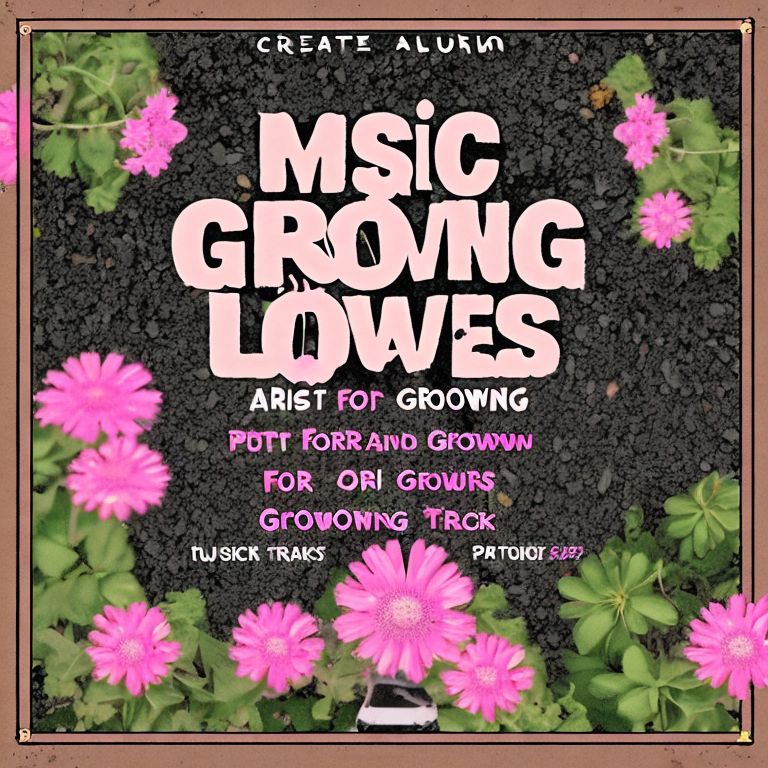

In [ ]:
# Generate the album cover
image = pipe(concise_prompt_text).images[0]

file_directory = "./art_cover/"

# Create the directory if it doesn't exist
os.makedirs(file_directory, exist_ok=True)
# Save and display the generated image
image.save(f"{file_directory}/{album_name[0]}_cover_text.png") # change this to get good file 
image.show()  # Opens the image here


### Load image
